markdown testing

We begin by loading the data and viewing the dataframe

In [19]:
import pandas as pd

# Load the CSV file 
file_path = r'C:\Users\GeorgeC\Documents\Flatiron\phase5\capstone_project\data\FAQ_extracted.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
df.head()


,Question,Answer
0,Why was the shift to Universal Health Coverage...,To ensure that all Kenyans have access to qual...
1,What is Social Health Insurance (SHI)?,It is a form of health financing mechanism bas...
2,What are the Principles of Social Health Insur...,"Accessible, quality, affordable healthcare ser..."
3,Why is Social Health Insurance important?,An efficient way of managing health funds – ab...
4,What are the 4 Health Laws?,1. The Social Health Insurance Law (2023) – Cr...


After loading the data, we need to add a `Category` column based on question ranges. This column will help group questions by themes (A-I), making intent creation easier.


In [20]:
# Define the category assignments based on question ranges
df['Category'] = ''  # Initialize the 'Category' column

# Assign categories based on the question ranges
df.loc[0:3, 'Category'] = 'Understanding Social Health Authority (SHA)'       # Questions 1 - 4
df.loc[4:17, 'Category'] = 'Institutions Created by UHC Laws and Transition'  # Questions 5 - 18
df.loc[18:23, 'Category'] = 'NHIF Staff Considerations During Transition'     # Questions 19 - 24
df.loc[24:30, 'Category'] = 'Primary Health Care & the PHC Fund'              # Questions 25 - 31
df.loc[31:35, 'Category'] = 'Emergency, Chronic, and Critical Illness Fund'   # Questions 32 - 36
df.loc[36:71, 'Category'] = 'Registration, Means Testing & Contributions'     # Questions 37 - 72
df.loc[72:83, 'Category'] = 'Benefits, Tariffs & Claims Management'           # Questions 73 - 84
df.loc[84:90, 'Category'] = 'Access & Quality of Service Provision'           # Questions 85 - 91
df.loc[91:92, 'Category'] = 'Feedback and Dispute Resolution'                 # Questions 92 - 93

# Check the DataFrame to verify the changes
df.head()



,Question,Answer,Category
0,Why was the shift to Universal Health Coverage...,To ensure that all Kenyans have access to qual...,Understanding Social Health Authority (SHA)
1,What is Social Health Insurance (SHI)?,It is a form of health financing mechanism bas...,Understanding Social Health Authority (SHA)
2,What are the Principles of Social Health Insur...,"Accessible, quality, affordable healthcare ser...",Understanding Social Health Authority (SHA)
3,Why is Social Health Insurance important?,An efficient way of managing health funds – ab...,Understanding Social Health Authority (SHA)
4,What are the 4 Health Laws?,1. The Social Health Insurance Law (2023) – Cr...,Institutions Created by UHC Laws and Transition


After labeling questions into categories, we clean the `Question` column by converting text to lowercase, removing punctuation, and preserving only four-digit numbers (years) to maintain consistent formatting for intent recognition.


In [21]:
import re

# Convert questions to lowercase
df['Question'] = df['Question'].str.lower()

# Remove all punctuation and special characters, but keep four-digit years
df['Question'] = df['Question'].apply(lambda x: re.sub(r'[^a-zA-Z\s]|\b(?!\d{4}\b)\b\d+\b', '', x))

# Remove duplicates based on the 'Question' column
df.drop_duplicates(subset='Question', inplace=True)

# Check the cleaned data
df.head()


,Question,Answer,Category
0,why was the shift to universal health coverage...,To ensure that all Kenyans have access to qual...,Understanding Social Health Authority (SHA)
1,what is social health insurance shi,It is a form of health financing mechanism bas...,Understanding Social Health Authority (SHA)
2,what are the principles of social health insur...,"Accessible, quality, affordable healthcare ser...",Understanding Social Health Authority (SHA)
3,why is social health insurance important,An efficient way of managing health funds – ab...,Understanding Social Health Authority (SHA)
4,what are the health laws,1. The Social Health Insurance Law (2023) – Cr...,Institutions Created by UHC Laws and Transition


### Intent and Entity Setup

After cleaning the data, we now define intents based on each category and question. This step involves organizing questions into intent groups (e.g., `ask_sha`, `ask_uhc_institutions`) and preparing example questions for each intent. We save these intents in a `nlu.yml` file, which will guide the model in recognizing user queries accurately.


In [28]:
project_root = r'C:\Users\GeorgeC\Documents\Flatiron\phase5\capstone_project'
# Define the YAML content for NLU data
nlu_yml_content = """
version: "3.1"

nlu:
  - intent: greet
    examples: |
      - hi
      - hello
      - hey
      - good morning
      - good afternoon
      - good evening
      - how are you?
      - hello there
      - hi there
      - hey! are you around?
      - hiya!
      - sup?
      - what's up?
      - morning
      - afternoon

  - intent: goodbye
    examples: |
      - goodbye
      - bye
      - see you later
      - talk to you soon
      - bye for now
      - catch you later
      - have a great day
      - take care
      - peace out
      - i'm out
      - alright, see you
      - bye bye
      - until next time
      - later

  - intent: bot_identity
    examples: |
      - are you a bot?
      - who are you?
      - are you human or a machine?
      - what is your purpose?
      - what kind of assistant are you?
      - can you tell me if you are a real person?
      - are you an ai?
      - are you a real person?
      - who built you?
      - what do you do?
      - can you tell me what you are?
      - tell me, are you human?
      - what's your job?
      - why are you here?
      - are you just a chatbot?

  - intent: why_shift_to_uhc
    examples: |
      - why did kenya shift to UHC?
      - why the move towards UHC?
      - why do we need universal health coverage?
      - why did they bring in UHC?
      - what's the reason behind UHC in kenya?
      - why UHC, what's the point?
      - why is universal health coverage important for us?
      - what led to the adoption of UHC?
      - what was wrong that led to UHC?
      - why the change to universal health coverage?
      - what motivated the move towards UHC in kenya?
      - why did we switch to UHC?

  - intent: what_is_shi
    examples: |
      - what is SHI?
      - what does social health insurance mean?
      - can you explain SHI to me?
      - how does SHI work?
      - what's SHI all about?
      - what is social health insurance?
      - how does social health insurance help people?
      - what's the idea behind SHI?
      - what exactly is SHI?
      - how does SHI help in healthcare?
      - can you explain social health insurance?
      - what is social health insurance all about?
      - tell me about SHI
      - what does SHI do for healthcare?

  - intent: principles_of_shi
    examples: |
      - what are the principles of SHI?
      - can you tell me the main principles of SHI?
      - what are the values that SHI is based on?
      - what are the guiding principles of SHI?
      - how does SHI work, what are its principles?
      - what makes SHI run?
      - what rules are SHI based on?
      - what are the key features of SHI?
      - what makes SHI operate?
      - what are the foundational principles of SHI?
      - what's important for SHI?
      - what are the guiding values of social health insurance?

  - intent: importance_of_shi
    examples: |
      - why is SHI important?
      - what makes social health insurance so important?
      - how does SHI benefit us?
      - why do we need SHI?
      - what's the point of SHI?
      - why should i care about SHI?
      - what's the importance of having SHI?
      - how does SHI help our healthcare?
      - why should we bother with social health insurance?
      - what's good about SHI for kenyans?
      - how does SHI improve the healthcare system?
      - why is SHI a good idea?

  - intent: health_laws_uhc
    examples: |
      - what health laws are there for UHC?
      - can you tell me about the UHC health laws?
      - what laws support universal health coverage?
      - which laws were passed for UHC?
      - what are the new healthcare laws under UHC?
      - what laws did kenya pass for UHC?
      - can you explain the health laws related to UHC?
      - what are the laws behind UHC?
      - what healthcare laws support UHC development?
      - what are the laws that were introduced for UHC?
      - which laws back up universal health coverage?

  - intent: reforms_shi_vs_nhif
    examples: |
      - why switch from NHIF to SHA?
      - why did kenya transition to SHA instead of keeping NHIF?
      - why not just improve NHIF?
      - why was SHA created in place of NHIF?
      - what's the reason for changing NHIF to SHA?
      - what led to SHA being formed over NHIF?
      - why reform NHIF into something new?
      - why did they choose SHA over NHIF?
      - why did the government create SHA?
      - what's wrong with NHIF that led to SHA?
      - why were healthcare reforms proposed under SHI?
      - why did we have to move to SHA?

  - intent: difference_sha_shif
    examples: |
      - how are SHA and SHIF different?
      - what's the difference between SHA and SHIF?
      - can you explain SHA vs SHIF?
      - are SHA and SHIF the same thing?
      - how does SHA differ from SHIF?
      - what's the role of SHA compared to SHIF?
      - what makes SHA different from SHIF?
      - how is SHA different from SHIF in terms of responsibilities?
      - what do SHA and SHIF do differently?
      - what's unique about SHA compared to SHIF?

  - intent: nhif_to_sha_transition_process
    examples: |
      - how will NHIF be phased out?
      - what's the plan for replacing NHIF with SHA?
      - how is NHIF changing into SHA?
      - what’s the process for moving from NHIF to SHA?
      - how will SHA take over NHIF?
      - how will the transition from NHIF to SHA work?
      - what steps are involved in the NHIF to SHA switch?
      - how will current NHIF members be moved to SHA?
      - what is happening with NHIF now that SHA is here?
      - what's the process for NHIF moving to SHA?

  - intent: continuity_of_services
    examples: |
      - will healthcare services continue during the transition?
      - how will continuity of services be ensured?
      - how is kenya ensuring people still get healthcare during the NHIF-SHA transition?
      - what will be done to keep healthcare running during the transition?
      - will services be interrupted during the NHIF-SHA switch?
      - what’s the plan for making sure services aren’t disrupted?
      - how will SHA ensure there are no gaps in services?
      - will my healthcare access be affected with the move to SHA?
      - what measures are there to ensure uninterrupted services?
      - how will continuity be maintained during NHIF's replacement?

  - intent: what_is_emergency_chronic_fund
    examples: |
      - what is the emergency chronic fund?
      - what does the emergency healthcare fund cover?
      - how does the critical illness fund work?
      - what's the emergency fund for healthcare?
      - who is covered by the emergency fund?
      - what healthcare costs are paid for by the emergency fund?
      - what is the role of the emergency fund?
      - how can i use the chronic illness fund?
      - who benefits from the emergency and chronic fund?
      - can the emergency fund help during an urgent health issue?

  - intent: staff_affected_transition
    examples: |
      - what happens to NHIF staff after the transition?
      - how will NHIF workers be impacted by SHA?
      - will NHIF staff lose their jobs?
      - will NHIF employees be part of SHA?
      - what's happening to NHIF employees now?
      - how does the SHA transition affect NHIF employees?
      - what options do NHIF staff have?
      - will NHIF workers get jobs at SHA?
      - how will NHIF workers be absorbed into SHA?
      - what's the future for NHIF staff with SHA?

  - intent: bot_challenge
    examples: |
      - are you a bot?
      - are you real?
      - are you human?
      - are you a machine?
      - are you just an AI?
      - tell me if you are a bot
      - are you real or just a chatbot?
      - prove to me you're not a bot
      - are you artificial?
      - is this a human talking?

  - intent: eligibility_sha
    examples: |
      - who can register for sha?
      - who is eligible to join sha?
      - is everyone eligible for sha?
      - can non-kenyans register for sha?
      - is sha open to all kenyans?
      - what are the requirements to register for sha?
      - who qualifies for the social health authority?

  - intent: sha_contributions
    examples: |
      - how do contributions work for sha?
      - how much should i contribute to sha?
      - who pays contributions for sha?
      - what is the rate of contributions to sha?
      - are contributions to sha mandatory?
      - how do i make contributions to sha?
      - what are the contribution rates under sha?

  - intent: access_primary_health_fund
    examples: |
      - how can i access the primary healthcare fund?
      - what services are covered by the primary healthcare fund?
      - how does the primary healthcare fund help me?
      - who can use the primary healthcare fund?
      - what is the primary healthcare fund used for?
      - is the primary healthcare fund available for everyone?
      - how can i benefit from the primary healthcare fund?

"""
import os
nlu_output_dir = os.path.join(project_root, 'rasa', 'data')
nlu_output_path = os.path.join(nlu_output_dir, 'nlu.yml')
os.makedirs(nlu_output_dir, exist_ok=True)
with open(nlu_output_path, 'w') as file:
    file.write(nlu_yml_content)
print("nlu.yml file created successfully at:", nlu_output_path)

nlu.yml file created successfully at: C:\Users\GeorgeC\Documents\Flatiron\phase5\capstone_project\rasa\data\nlu.yml


# Creating `domain.yml` for Rasa Chatbot

After defining `nlu.yml` with intents and questions, we proceed to create `domain.yml`, which configures the chatbot’s responses and intents

The `domain.yml` file helps Rasa:
- Recognize **intents** and map them to responses.
- Store **responses** for each intent.

    



In [27]:
# Define the domain content for Rasa in YAML format as a raw string
domain_yml_content = r"""

version: "3.1"

intents:
  - greet
  - goodbye
  - bot_identity
  - why_shift_to_uhc
  - what_is_shi
  - principles_of_shi
  - importance_of_shi
  - health_laws_uhc
  - reforms_shi_vs_nhif
  - difference_sha_shif
  - nhif_to_sha_transition_process
  - continuity_of_services
  - what_is_emergency_chronic_fund
  - staff_affected_transition
  - eligibility_sha
  - sha_contributions
  - access_primary_health_fund
  - sha_benefits_low_income
  - penalties_for_late_payment
  - choose_provider_sha
  - sha_manage_quality
  - ask_sha
  - ask_uhc_institutions
  - ask_nhif_transition
  - ask_phc_fund
  - ask_emergency_fund
  - ask_registration
  - ask_service_quality
  - ask_benefits_claims
  - ask_feedback_resolution
  - bot_challenge

responses:
  utter_greet:
    - text: "Hello! How can I assist you today?"
    - text: "Hi there! How can I help you with your healthcare questions?"
    - text: "Hey! What would you like to know today about healthcare?"

  utter_goodbye:
    - text: "Goodbye! Have a great day!"
    - text: "Bye! Feel free to ask if you have more questions."
    - text: "Take care! If you need more information, I'm here."

  utter_bot_identity:
    - text: "I am a virtual assistant designed to provide information about the Social Health Authority (SHA) and Universal Health Coverage (UHC) in Kenya."
    - text: "I am an automated assistant here to answer your questions about healthcare services, SHA, and UHC in Kenya."
    - text: "You are chatting with an AI assistant focused on providing information regarding health coverage in Kenya."

  utter_why_shift_to_uhc:
    - text: "The shift to Universal Health Coverage (UHC) in Kenya was to ensure all Kenyans have access to quality, affordable, and comprehensive health services without facing financial hardship."

  utter_what_is_shi:
    - text: "Social Health Insurance (SHI) is a health financing mechanism that pools resources from contributions to increase the efficiency of the healthcare system. It ensures people can access services when needed without worrying about immediate costs."

  utter_principles_of_shi:
    - text: "The principles of Social Health Insurance include ensuring accessible, quality, and affordable healthcare for everyone; a well-defined benefit package anchored in law; mandatory registration and contribution; and equity in access."

  utter_importance_of_shi:
    - text: "SHI is crucial for managing healthcare funds efficiently and equitably. It allows for targeted funding based on needs, reduces administrative costs, and promotes transparency through direct contributions from beneficiaries."

  utter_health_laws_uhc:
    - text: "The health laws supporting UHC in Kenya include: The Social Health Insurance Law (2023), The Digital Health Act (2023), Facility Improvement Financing Law (2023), and Primary Care Networks Law (2023)."

  utter_reforms_shi_vs_nhif:
    - text: "The shift from NHIF to SHA was aimed at creating a more efficient system that consolidates fragmented insurance pools, promoting equitable access."

  utter_difference_sha_shif:
    - text: "SHA, the Social Health Authority, manages funds including the Primary Healthcare Fund (PHCF), Social Health Insurance Fund (SHIF), and the Emergency Fund. SHIF is one of the funds overseen by SHA."

  utter_nhif_to_sha_transition_process:
    - text: "The transition from NHIF to SHA involves transferring responsibilities and resources, with the completion expected by July 2024."

  utter_continuity_of_services:
    - text: "SHA regulations provide that all current NHIF contracts and memberships will be honored until June 30, 2024, ensuring no disruption in healthcare services."

  utter_what_is_emergency_chronic_fund:
    - text: "The Emergency, Chronic, and Critical Illness Fund is set up to cover healthcare costs for chronic illnesses after exhausting SHI coverage, as well as emergencies that require additional financial support."

  utter_staff_affected_transition:
    - text: "NHIF staff will be affected by SHA's formation. Qualified staff can apply for new roles, and those who aren't absorbed can choose early retirement or redeployment within public services."

  utter_eligibility_sha:
    - text: "All Kenyans, as well as non-Kenyan residents in the country for over 12 months, must register for SHA."

  utter_sha_contributions:
    - text: "Contributions to SHA will depend on household income, with salaried employees paying a monthly rate and informal sector members paying annually. The contribution rate is set at 2.75% of income."

  utter_access_primary_health_fund:
    - text: "The Primary Healthcare Fund (PHCF) is used to cover services provided at level 2 and 3 health facilities. Registration for Social Health Insurance automatically grants access to PHCF."

actions:
  - utter_greet
  - utter_goodbye
  - utter_bot_identity
  - utter_why_shift_to_uhc
  - utter_what_is_shi
  - utter_principles_of_shi
  - utter_importance_of_shi
  - utter_health_laws_uhc
  - utter_reforms_shi_vs_nhif
  - utter_difference_sha_shif
  - utter_nhif_to_sha_transition_process
  - utter_continuity_of_services
  - utter_what_is_emergency_chronic_fund
  - utter_staff_affected_transition
  - utter_eligibility_sha
  - utter_sha_contributions
  - utter_access_primary_health_fund

"""
domain_output_dir = os.path.join(project_root, 'rasa')
domain_output_path = os.path.join(domain_output_dir, 'domain.yml')
os.makedirs(domain_output_dir, exist_ok=True)
with open(domain_output_path, 'w') as file:
    file.write(domain_yml_content)
print("domain.yml file created successfully at:", domain_output_path)

domain.yml file created successfully at: C:\Users\GeorgeC\Documents\Flatiron\phase5\capstone_project\rasa\domain.yml


# Creating stories.yml

Here, we create the `stories.yml` file, which defines the flow of conversations for the chatbot. it  Maps out sequences of intents and responses, enabling the bot to manage conversational paths. This structure allows the chatbot to handle multi-step conversations and deliver responses based on the user’s context.


In [24]:
# Define the stories content for Rasa in YAML format
stories_yml_content = """
version: "3.1"

version: "3.1"

stories:
  - story: greet and bot introduction
    steps:
      - intent: greet
      - action: utter_greet
      - intent: bot_identity
      - action: utter_bot_identity

  - story: ask about UHC shift
    steps:
      - intent: why_shift_to_uhc
      - action: utter_why_shift_to_uhc

  - story: ask about SHI
    steps:
      - intent: what_is_shi
      - action: utter_what_is_shi

  - story: ask about principles of SHI
    steps:
      - intent: principles_of_shi
      - action: utter_principles_of_shi

  - story: ask importance of SHI
    steps:
      - intent: importance_of_shi
      - action: utter_importance_of_shi

  - story: ask about health laws under UHC
    steps:
      - intent: health_laws_uhc
      - action: utter_health_laws_uhc

  - story: reforms SHI vs NHIF
    steps:
      - intent: reforms_shi_vs_nhif
      - action: utter_reforms_shi_vs_nhif

  - story: difference between SHA and SHIF
    steps:
      - intent: difference_sha_shif
      - action: utter_difference_sha_shif

  - story: NHIF to SHA transition process
    steps:
      - intent: nhif_to_sha_transition_process
      - action: utter_nhif_to_sha_transition_process

  - story: continuity of services during transition
    steps:
      - intent: continuity_of_services
      - action: utter_continuity_of_services

  - story: emergency, chronic, and critical illness fund
    steps:
      - intent: what_is_emergency_chronic_fund
      - action: utter_what_is_emergency_chronic_fund

  - story: staff affected by transition
    steps:
      - intent: staff_affected_transition
      - action: utter_staff_affected_transition

  - story: eligibility for SHA registration
    steps:
      - intent: eligibility_sha
      - action: utter_eligibility_sha

  - story: SHA contributions details
    steps:
      - intent: sha_contributions
      - action: utter_sha_contributions

  - story: accessing the primary health care fund
    steps:
      - intent: access_primary_health_fund
      - action: utter_access_primary_health_fund

  - story: SHA benefits for low-income individuals
    steps:
      - intent: sha_benefits_low_income
      - action: utter_sha_benefits_low_income

  - story: penalties for late payment
    steps:
      - intent: penalties_for_late_payment
      - action: utter_penalties_for_late_payment

  - story: choosing healthcare provider under SHA
    steps:
      - intent: choose_provider_sha
      - action: utter_choose_provider_sha

  - story: quality management by SHA
    steps:
      - intent: sha_manage_quality
      - action: utter_sha_manage_quality

  - story: ask about SHA details
    steps:
      - intent: ask_sha
      - action: utter_ask_sha

  - story: ask about UHC institutions
    steps:
      - intent: ask_uhc_institutions
      - action: utter_ask_uhc_institutions

  - story: ask about NHIF to SHA transition process
    steps:
      - intent: ask_nhif_transition
      - action: utter_nhif_to_sha_transition_process

  - story: ask about primary healthcare fund
    steps:
      - intent: ask_phc_fund
      - action: utter_access_primary_health_fund

  - story: ask about emergency fund
    steps:
      - intent: ask_emergency_fund
      - action: utter_what_is_emergency_chronic_fund

  - story: registration for SHA
    steps:
      - intent: ask_registration
      - action: utter_eligibility_sha

  - story: ask about SHA service quality
    steps:
      - intent: ask_service_quality
      - action: utter_sha_manage_quality

  - story: ask about SHA benefits claims process
    steps:
      - intent: ask_benefits_claims
      - action: utter_ask_benefits_claims

  - story: feedback resolution under SHA
    steps:
      - intent: ask_feedback_resolution
      - action: utter_ask_feedback_resolution

  - story: bot challenge
    steps:
      - intent: bot_challenge
      - action: utter_iamabot

  - story: say goodbye
    steps:
      - intent: goodbye
      - action: utter_goodbye

"""
stories_output_dir = os.path.join(project_root, 'rasa', 'data')
stories_output_path = os.path.join(stories_output_dir, 'stories.yml')
os.makedirs(stories_output_dir, exist_ok=True)
with open(stories_output_path, 'w') as file:
    file.write(stories_yml_content)
print("stories.yml file created successfully at:", stories_output_path)

stories.yml file created successfully at: C:\Users\GeorgeC\Documents\Flatiron\phase5\capstone_project\rasa\data\stories.yml


# Model Training and Evaluation in Rasa

Here we document the training, evaluation, and visualization of our Rasa model to track our process for future reference and project documentation.


## 1. Model Training

Model training is conducted in the terminal using the command below. This command specifies paths for the configuration, domain, and data to train both the NLU and Core models.

```bash
 rasa train --config rasa/config.yml --domain rasa/domain.yml --data rasa/data/
```

### NLU Model Evaluation 

The NLU evaluation assesses intent classification and entity extraction accuracy against the NLU test data:

```bash
$ rasa test nlu --nlu 
```

### Plotting F1 Scores for Intent Evaluation

After training and testing the Rasa NLU model, we use the following code to plot a histogram of F1 scores for each intent. This visualization helps us assess how well the model recognizes each intent and identify areas for improvement.



Overall Model Accuracy: 73.00%


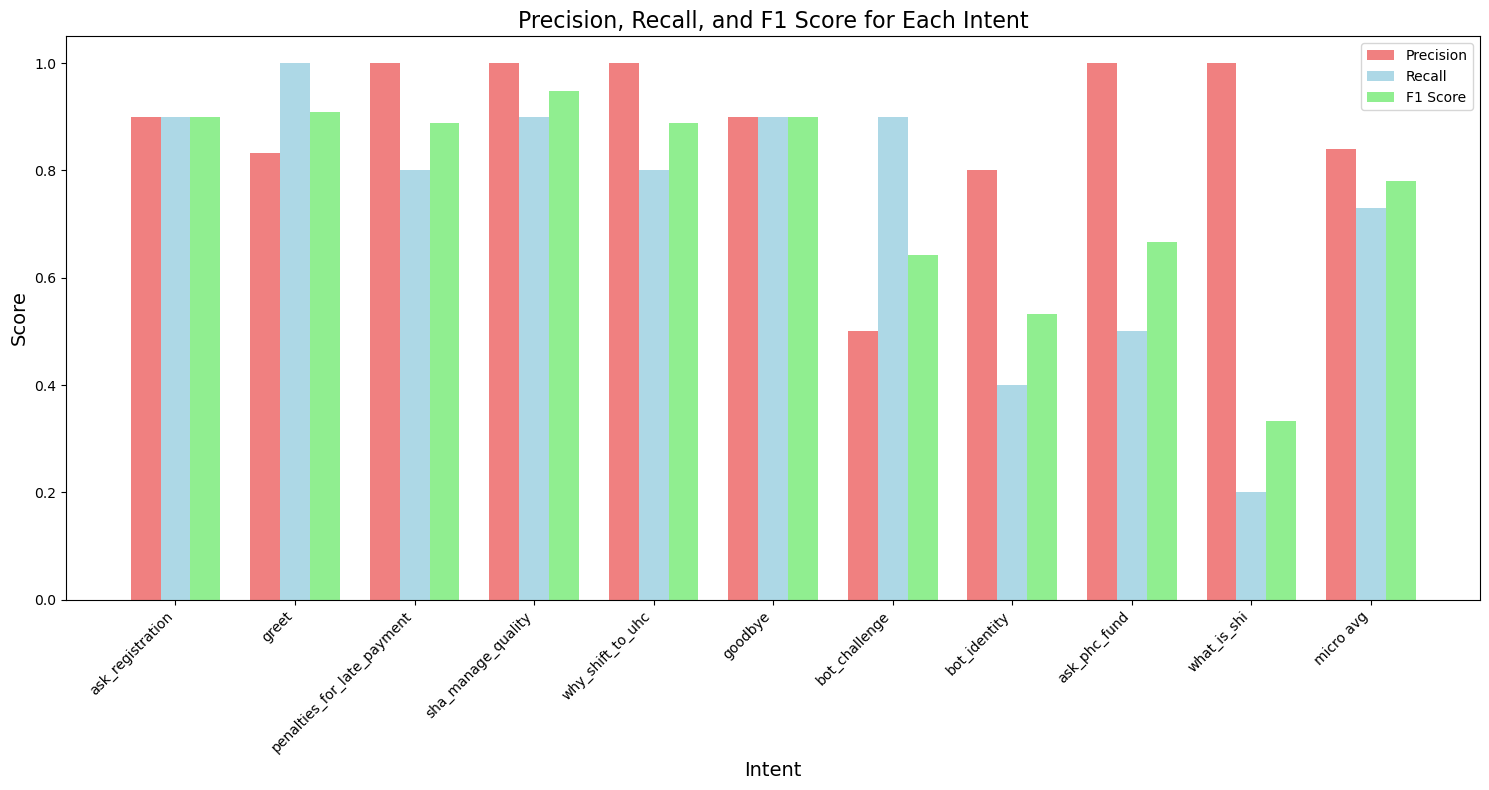

Histogram saved at: C:\Users\GeorgeC\Documents\Flatiron\phase5\capstone_project\rasa\results\intent_metrics_histogram.png


In [25]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

# Use the updated path to the intent report
report_path = r"C:\Users\GeorgeC\Documents\Flatiron\phase5\capstone_project\rasa\results\intent_report.json"

# Check if the report path exists
if not os.path.exists(report_path):
    print(f"Error: The intent report at {report_path} was not found.")
    exit(1)

# Load the intent report
with open(report_path, "r") as f:
    report = json.load(f)

# Extract intents and metrics (precision, recall, F1-score)
intents = []
precision_scores = []
recall_scores = []
f1_scores = []

for intent, metrics in report.items():
    if intent not in ['accuracy', 'macro avg', 'weighted avg']:  # Skip summary metrics
        if 'precision' in metrics and 'recall' in metrics and 'f1-score' in metrics:
            intents.append(intent)
            precision_scores.append(float(metrics['precision']))
            recall_scores.append(float(metrics['recall']))
            f1_scores.append(float(metrics['f1-score']))
        else:
            print(f"Warning: Metrics for intent '{intent}' are incomplete. Skipping...")

# Extract overall accuracy
accuracy = report.get('accuracy', None)

if accuracy is not None:
    accuracy_percentage = accuracy * 100
    print(f"Overall Model Accuracy: {accuracy_percentage:.2f}%")
else:
    print("Accuracy information is not available in the report.")

# Check if there is any data to plot
if not intents:
    print("No intents found with valid metrics to plot.")
    exit(1)

# Set the width for each bar
bar_width = 0.25
index = np.arange(len(intents))

# Plot Precision, Recall, and F1 Score for each intent
plt.figure(figsize=(15, 8))

# Creating bars for precision, recall, and F1
plt.bar(index, precision_scores, bar_width, label='Precision', color='lightcoral')
plt.bar(index + bar_width, recall_scores, bar_width, label='Recall', color='lightblue')
plt.bar(index + 2 * bar_width, f1_scores, bar_width, label='F1 Score', color='lightgreen')

# Adding labels and titles
plt.xlabel('Intent', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Precision, Recall, and F1 Score for Each Intent', fontsize=16)
plt.xticks(index + bar_width, intents, rotation=45, ha='right')
plt.legend()

# Adjust layout and save
plt.tight_layout()
histogram_path = os.path.join(os.path.dirname(report_path), 'intent_metrics_histogram.png')
plt.savefig(histogram_path)

# Show the plot
plt.show()

print(f"Histogram saved at: {histogram_path}")


###  File Updates for Rasa Model Improvement
To improve our Rasa models, we focused on updating and optimizing four key .yml files—config.yml, domain.yml, nlu.yml, and stories.yml.
Despite our efforts, the accuracy remained at 73%, with no significant improvement. Here’s a brief summary of what we changed:


#### 1. config.yml: Adjusted the pipeline to include advanced components for better feature extraction.
#### 2. domain.yml: Cleaned up duplicate responses and refined intents.
#### 3. nlu.yml: Added more diverse examples to better differentiate similar intents.
#### 4. stories.yml: Expanded stories to cover additional conversation paths.


### Model Testing and Evaluation

After completing the model training phase, we proceeded to evaluate the model's performance - the accuracy improved from **`73%`** to **`98%`**

**NLU Evaluation**: We tested the trained model's ability to classify user intents and extract entities correctly by running the NLU evaluation against the test dataset (`test_nlu.yml`). The evaluation generated metrics such as **precision**, **recall**, **F1-score**, and an overall **accuracy** value for each intent. These metrics help us understand how well the model can understand and classify different user inputs.

Overall Model Accuracy: 98.00%


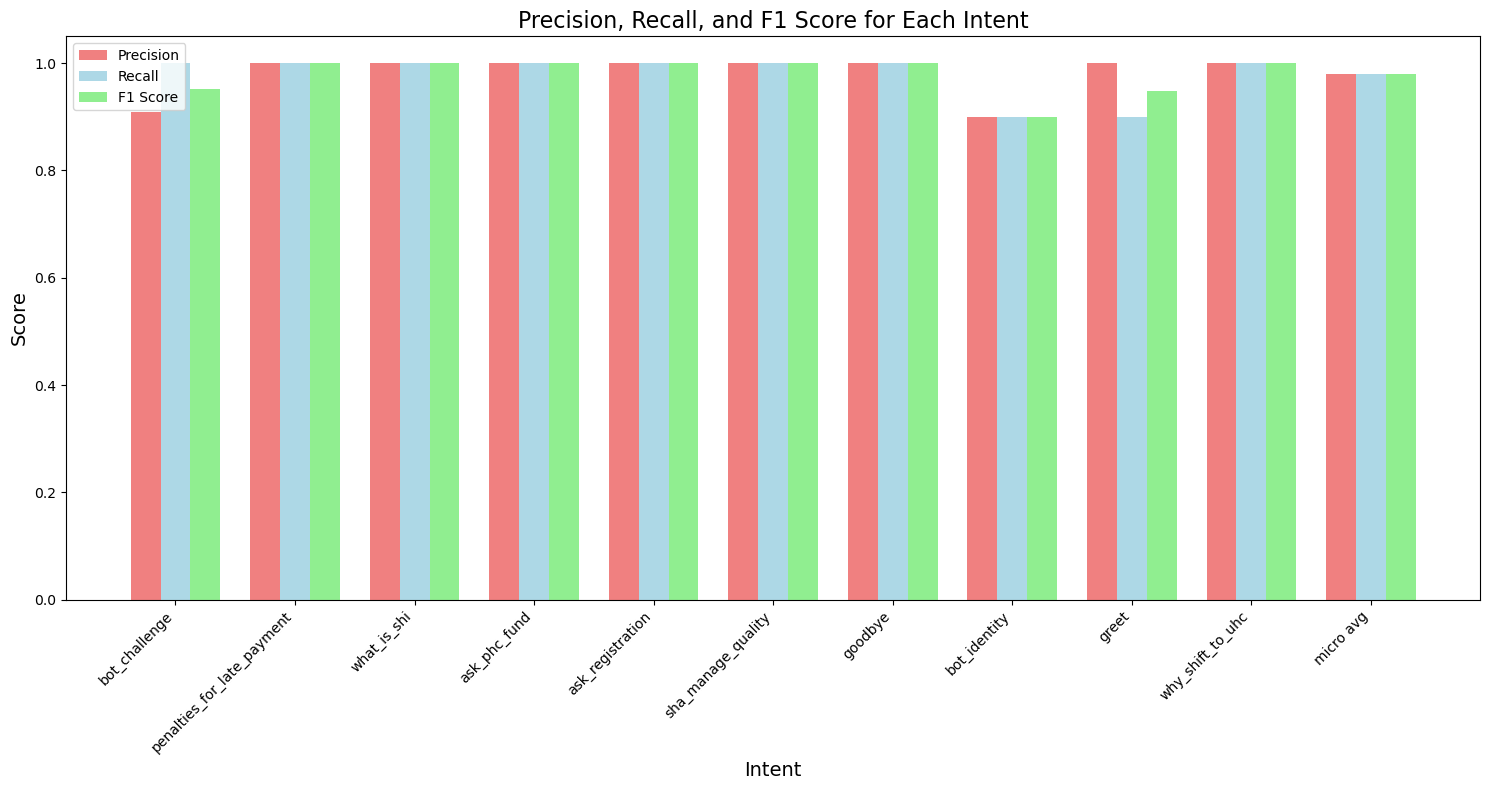

Histogram saved at: C:\Users\GeorgeC\Documents\Flatiron\phase5\capstone_project\results\intent_metrics_histogram.png


In [26]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

# Use the exact path to the intent report
report_path = r"C:\Users\GeorgeC\Documents\Flatiron\phase5\capstone_project\results\intent_report.json"

# Check if the report path exists
if not os.path.exists(report_path):
    print(f"Error: The intent report at {report_path} was not found.")
    exit(1)

# Load the intent report
with open(report_path, "r") as f:
    report = json.load(f)

# Extract intents and metrics (precision, recall, F1-score)
intents = []
precision_scores = []
recall_scores = []
f1_scores = []

for intent, metrics in report.items():
    if intent not in ['accuracy', 'macro avg', 'weighted avg']:  # Skip summary metrics
        if 'precision' in metrics and 'recall' in metrics and 'f1-score' in metrics:
            intents.append(intent)
            precision_scores.append(float(metrics['precision']))
            recall_scores.append(float(metrics['recall']))
            f1_scores.append(float(metrics['f1-score']))
        else:
            print(f"Warning: Metrics for intent '{intent}' are incomplete. Skipping...")

# Extract overall accuracy
accuracy = report.get('accuracy', None)

if accuracy is not None:
    accuracy_percentage = accuracy * 100
    print(f"Overall Model Accuracy: {accuracy_percentage:.2f}%")
else:
    print("Accuracy information is not available in the report.")

# Check if there is any data to plot
if not intents:
    print("No intents found with valid metrics to plot.")
    exit(1)

# Set the width for each bar
bar_width = 0.25
index = np.arange(len(intents))

# Plot Precision, Recall, and F1 Score for each intent
plt.figure(figsize=(15, 8))

# Creating bars for precision, recall, and F1
plt.bar(index, precision_scores, bar_width, label='Precision', color='lightcoral')
plt.bar(index + bar_width, recall_scores, bar_width, label='Recall', color='lightblue')
plt.bar(index + 2 * bar_width, f1_scores, bar_width, label='F1 Score', color='lightgreen')

# Adding labels and titles
plt.xlabel('Intent', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Precision, Recall, and F1 Score for Each Intent', fontsize=16)
plt.xticks(index + bar_width, intents, rotation=45, ha='right')
plt.legend()

# Adjust layout and save
plt.tight_layout()
histogram_path = os.path.join(os.path.dirname(report_path), 'intent_metrics_histogram.png')
plt.savefig(histogram_path)

# Show the plot
plt.show()

print(f"Histogram saved at: {histogram_path}")
